#### Aluno: Gustavo Silveia Dias 
#### Curso: Bacharelado em Engenharia de Computação
#### Disciplina: Processamento Digital de Imagens

In [30]:
import numpy as np
import matplotlib.pyplot as plt


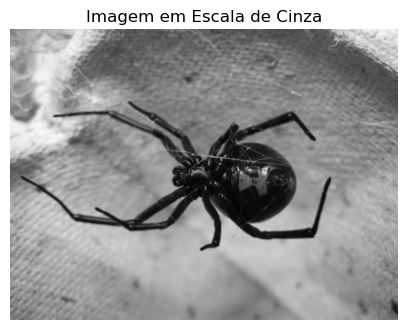

In [31]:
imagem = plt.imread('aranha.jpg')

# Caso a imagem esteja com valores entre 0 e 1, normalizamos para 0-255
if imagem.dtype == np.float32 or imagem.dtype == np.float64:
    imagem = (imagem * 255).astype(np.uint8)

# Obter dimensões
altura, largura, canais = imagem.shape

# Converter manualmente para cinza
img_gray = np.zeros((altura, largura), dtype=np.uint8)

for y in range(altura):
    for x in range(largura):
        r, g, b = imagem[y, x]
        # Fórmula da luminância
        gray = int(0.299*r + 0.587*g + 0.114*b)
        img_gray[y, x] = gray

# Exibir imagem em escala de cinza
plt.figure(figsize=(5,5))
plt.imshow(img_gray, cmap='gray')
plt.title('Imagem em Escala de Cinza')
plt.axis('off')
plt.show()

In [32]:

prewitt_x = np.array([[ -1, 0, 1],
                      [ -1, 0, 1],
                      [ -1, 0, 1]])

prewitt_y = np.array([[ -1, -1, -1],
                      [  0,  0,  0],
                      [  1,  1,  1]])

sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]])

sobel_y = np.array([[ -1, -2, -1],
                    [  0,  0,  0],
                    [  1,  2,  1]])

laplaciano = np.array([[ 0, -1, 0],
                       [-1,  4,-1],
                       [ 0, -1, 0]])


In [33]:

def aplicar_filtro(img, kernel):
    altura, largura = img.shape
    k = kernel.shape[0] // 2
    saida = np.zeros_like(img, dtype=float)

    for y in range(k, altura - k):
        for x in range(k, largura - k):
            soma = 0
            for i in range(-k, k+1):
                for j in range(-k, k+1):
                    soma += img[y+i, x+j] * kernel[i+k, j+k]
            saida[y, x] = soma

    # Normalizar para [0,255]
    saida = np.clip(saida, 0, 255)
    return saida.astype(np.uint8)


In [34]:

gx_prewitt = aplicar_filtro(img_gray, prewitt_x)
gy_prewitt = aplicar_filtro(img_gray, prewitt_y)
prewitt = np.hypot(gx_prewitt, gy_prewitt)
prewitt = np.clip(prewitt, 0, 255).astype(np.uint8)

# Sobel
gx_sobel = aplicar_filtro(img_gray, sobel_x)
gy_sobel = aplicar_filtro(img_gray, sobel_y)
sobel = np.hypot(gx_sobel, gy_sobel)
sobel = np.clip(sobel, 0, 255).astype(np.uint8)

# Laplaciano
lap = aplicar_filtro(img_gray, laplaciano)


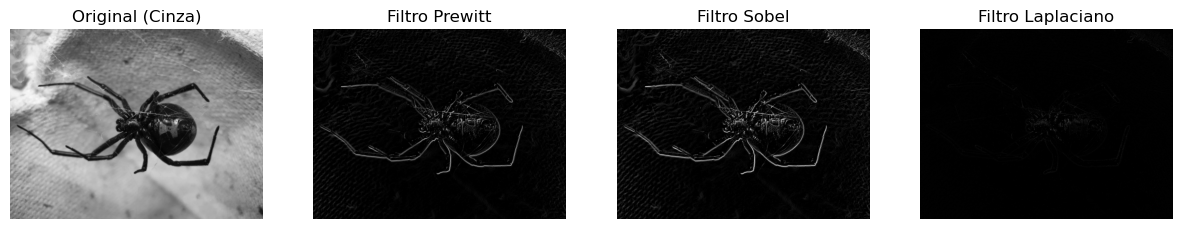

In [35]:

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original (Cinza)')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(prewitt, cmap='gray')
plt.title('Filtro Prewitt')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(sobel, cmap='gray')
plt.title('Filtro Sobel')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(lap, cmap='gray')
plt.title('Filtro Laplaciano')
plt.axis('off')

plt.show()


In [36]:
print("""
Observações:

- O filtro Prewitt destaca bem as bordas horizontais e verticais, mas de forma mais suave.
- O filtro Sobel apresenta bordas mais intensas e bem definidas — principalmente nas transições mais fortes.
- O Laplaciano realça bordas em todas as direções, sem diferenciar horizontal ou vertical, 
  resultando em uma imagem com mais detalhes, mas também com mais ruído.
- Prewitt e Sobel têm direção (horizontal/vertical), enquanto Laplaciano não tem orientação direcional.
""")



Observações:

- O filtro Prewitt destaca bem as bordas horizontais e verticais, mas de forma mais suave.
- O filtro Sobel apresenta bordas mais intensas e bem definidas — principalmente nas transições mais fortes.
- O Laplaciano realça bordas em todas as direções, sem diferenciar horizontal ou vertical, 
  resultando em uma imagem com mais detalhes, mas também com mais ruído.
- Prewitt e Sobel têm direção (horizontal/vertical), enquanto Laplaciano não tem orientação direcional.

